In [161]:
import time
import sqlite3
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


GECKODRIVER_PATH = r'C:\Users\Batia\Downloads\geckodriver-v0.34.0-win64\geckodriver.exe'


conn = sqlite3.connect('cars1.db')
cursor = conn.cursor()


cursor.execute('''
    CREATE TABLE IF NOT EXISTS car_listings (
        brand TEXT, model TEXT, price TEXT, seller TEXT, location TEXT, phone TEXT,
        registration_year TEXT, mileage TEXT, engine TEXT, fuel_type TEXT, body_type TEXT,
        doors TEXT, transmission TEXT, color TEXT, tech_check TEXT, wheel_size TEXT,
        seats TEXT, co2_emission TEXT
    )
''')

# Initialize WebDriver function
def initialize_driver():
    service = Service(GECKODRIVER_PATH)
    options = FirefoxOptions()
    options.add_argument('--incognito')
    options.add_argument('--headless')
    return webdriver.Firefox(service=service, options=options)

# Start driver
driver = initialize_driver()


df = pd.read_csv('autoplius_listings.csv')


MULTI_WORD_BRANDS = ["Land Rover", "Alfa Romeo", "Aston Martin", "Rolls Royce"]

def extract_brand_and_model(full_title):
    """Extracts the brand and model correctly, handling multi-word brands."""
    words = full_title.split(',')[0].split(' ')
    possible_brand = ' '.join(words[:2])

    if possible_brand in MULTI_WORD_BRANDS:
        brand = possible_brand
        model = ' '.join(words[2:])
    else:
        brand = words[0]
        model = ' '.join(words[1:])

    return brand, model

def scrape_data(url):
    global driver  # Declare global to modify the outer 'driver' variable

    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'page-title')))

        
        full_title = driver.find_element(By.CLASS_NAME, 'page-title').find_element(By.TAG_NAME, 'h1').text
        brand, model = extract_brand_and_model(full_title)

        
        price = driver.find_element(By.CLASS_NAME, 'price').text.strip()

        
        seller = driver.find_element(By.CLASS_NAME, 'seller-contact-name').text.strip()
        location = driver.find_element(By.CLASS_NAME, 'seller-contact-location').text.strip()
        phone = driver.find_element(By.CLASS_NAME, 'js-phone-number').get_attribute('data-clipboard-text')

        
        def safe_find_parameter(label):
            try:
                param_element = driver.find_element(
                    By.XPATH, f"//div[contains(., '{label}')]/following-sibling::div"
                )
                return param_element.text.strip()
            except:
                return ''  

        
        registration_year = safe_find_parameter('Pirma registracija')
        mileage = safe_find_parameter('Rida')
        engine = safe_find_parameter('Variklis')
        fuel_type = safe_find_parameter('Kuro tipas')
        body_type = safe_find_parameter('Kėbulo tipas')
        doors = safe_find_parameter('Durų skaičius')
        transmission = safe_find_parameter('Pavarų dėžė')
        color = safe_find_parameter('Spalva')
        tech_check = safe_find_parameter('Tech. apžiūra iki')
        wheel_size = safe_find_parameter('Ratlankių skersmuo')
        seats = safe_find_parameter('Sėdimų vietų skaičius')
        co2_emission = safe_find_parameter('CO₂ emisija, g/km')

        
        cursor.execute('''
            INSERT INTO car_listings (
                brand, model, price, seller, location, phone,
                registration_year, mileage, engine, fuel_type, body_type,
                doors, transmission, color, tech_check, wheel_size,
                seats, co2_emission
            ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (brand, model, price, seller, location, phone,
              registration_year, mileage, engine, fuel_type, body_type,
              doors, transmission, color, tech_check, wheel_size,
              seats, co2_emission))

        conn.commit()
        print(f"Successfully scraped {url}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        driver.quit()  # Close the driver and restart it
        time.sleep(2)
        driver = initialize_driver()  # Re-initialize the driver


for index, row in df.iterrows():
    scrape_data(row['Link'])


cursor.close()
conn.close()
driver.quit()


Successfully scraped https://autoplius.lt/skelbimai/bmw-428-gran-coupe-2-0-l-kupe-coupe-2015-benzinas-26837939.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-530-2-0-l-sedanas-2019-benzinas-26808537.html
Successfully scraped https://autoplius.lt/skelbimai/volkswagen-golf-1-6-l-universalas-2014-dyzelinas-26842557.html
Successfully scraped https://autoplius.lt/skelbimai/fiat-500x-2-4-l-visureigis-krosoveris-2016-benzinas-dujos-26862175.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-320-gran-turismo-2-0-l-hecbekas-2016-dyzelinas-26830873.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-320-2-0-l-universalas-2020-dyzelinas-26852143.html
Successfully scraped https://autoplius.lt/skelbimai/mazda-cx-5-2-0-l-visureigis-krosoveris-2017-benzinas-26740367.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-520-2-0-l-universalas-2006-dyzelinas-26806059.html
Successfully scraped https://autoplius.lt/skelbimai/volkswagen-amarok-2-0-l-pikapas-2014-dyze

WebDriverException: Message: Process unexpectedly closed with status 0


In [162]:
import time
import sqlite3
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


GECKODRIVER_PATH = r'C:\Users\Batia\Downloads\geckodriver-v0.34.0-win64\geckodriver.exe'


conn = sqlite3.connect('cars1.db')
cursor = conn.cursor()


cursor.execute('''
    CREATE TABLE IF NOT EXISTS car_listings (
        brand TEXT, model TEXT, price TEXT, seller TEXT, location TEXT, phone TEXT,
        registration_year TEXT, mileage TEXT, engine TEXT, fuel_type TEXT, body_type TEXT,
        doors TEXT, transmission TEXT, color TEXT, tech_check TEXT, wheel_size TEXT,
        seats TEXT, co2_emission TEXT
    )
''')


def initialize_driver():
    service = Service(GECKODRIVER_PATH)
    options = FirefoxOptions()
    options.add_argument('--incognito')
    options.add_argument('--headless')
    return webdriver.Firefox(service=service, options=options)

# Start driver
driver = initialize_driver()


df = pd.read_csv('autoplius_listings.csv')


MULTI_WORD_BRANDS = ["Land Rover", "Alfa Romeo", "Aston Martin", "Rolls Royce"]

def extract_brand_and_model(full_title):
    """Extracts the brand and model correctly, handling multi-word brands."""
    words = full_title.split(',')[0].split(' ')
    possible_brand = ' '.join(words[:2])

    if possible_brand in MULTI_WORD_BRANDS:
        brand = possible_brand
        model = ' '.join(words[2:])
    else:
        brand = words[0]
        model = ' '.join(words[1:])

    return brand, model

def scrape_data(url):
    global driver  # Declare global to modify the outer 'driver' variable

    try:
        driver.get(url)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'page-title')))

        
        full_title = driver.find_element(By.CLASS_NAME, 'page-title').find_element(By.TAG_NAME, 'h1').text
        brand, model = extract_brand_and_model(full_title)

        
        price = driver.find_element(By.CLASS_NAME, 'price').text.strip()

        
        seller = driver.find_element(By.CLASS_NAME, 'seller-contact-name').text.strip()
        location = driver.find_element(By.CLASS_NAME, 'seller-contact-location').text.strip()
        phone = driver.find_element(By.CLASS_NAME, 'js-phone-number').get_attribute('data-clipboard-text')

        
        def safe_find_parameter(label):
            try:
                param_element = driver.find_element(
                    By.XPATH, f"//div[contains(., '{label}')]/following-sibling::div"
                )
                return param_element.text.strip()
            except:
                return ''  

        
        registration_year = safe_find_parameter('Pirma registracija')
        mileage = safe_find_parameter('Rida')
        engine = safe_find_parameter('Variklis')
        fuel_type = safe_find_parameter('Kuro tipas')
        body_type = safe_find_parameter('Kėbulo tipas')
        doors = safe_find_parameter('Durų skaičius')
        transmission = safe_find_parameter('Pavarų dėžė')
        color = safe_find_parameter('Spalva')
        tech_check = safe_find_parameter('Tech. apžiūra iki')
        wheel_size = safe_find_parameter('Ratlankių skersmuo')
        seats = safe_find_parameter('Sėdimų vietų skaičius')
        co2_emission = safe_find_parameter('CO₂ emisija, g/km')

        
        cursor.execute('''
            INSERT INTO car_listings (
                brand, model, price, seller, location, phone,
                registration_year, mileage, engine, fuel_type, body_type,
                doors, transmission, color, tech_check, wheel_size,
                seats, co2_emission
            ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (brand, model, price, seller, location, phone,
              registration_year, mileage, engine, fuel_type, body_type,
              doors, transmission, color, tech_check, wheel_size,
              seats, co2_emission))

        conn.commit()
        print(f"Successfully scraped {url}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        driver.quit()  # Close the driver and restart it
        time.sleep(2)
        driver = initialize_driver()  # Re-initialize the driver

# Function to find the starting point in the CSV
def find_start_index(df, start_url):
    try:
        return df[df['Link'] == start_url].index[0]
    except IndexError:
        print(f"Start URL {start_url} not found in CSV.")
        return None


start_url = "https://autoplius.lt/skelbimai/bmw-x3-2-0-l-visureigis-krosoveris-2006-benzinas-26811501.html"
start_index = find_start_index(df, start_url)

if start_index is not None:
    
    for index, row in df.iloc[start_index:].iterrows():
        scrape_data(row['Link'])


cursor.close()
conn.close()
driver.quit()


Successfully scraped https://autoplius.lt/skelbimai/bmw-x3-2-0-l-visureigis-krosoveris-2006-benzinas-26811501.html
Successfully scraped https://autoplius.lt/skelbimai/opel-insignia-2-0-l-universalas-2014-dyzelinas-26851443.html
Successfully scraped https://autoplius.lt/skelbimai/fiat-punto-evo-1-3-l-hecbekas-2012-dyzelinas-26872229.html
Successfully scraped https://autoplius.lt/skelbimai/bmw-120-2-0-l-hecbekas-2007-dyzelinas-26715439.html
Successfully scraped https://autoplius.lt/skelbimai/ford-c-max-1-6-l-vienaturis-2010-dyzelinas-26814417.html
Successfully scraped https://autoplius.lt/skelbimai/citroen-c5-1-6-l-universalas-2009-dyzelinas-26872009.html
Successfully scraped https://autoplius.lt/skelbimai/mercedes-benz-e270-2-7-l-universalas-2003-dyzelinas-26616233.html
Successfully scraped https://autoplius.lt/skelbimai/nissan-note-1-6-l-hecbekas-2006-benzinas-26765901.html
Successfully scraped https://autoplius.lt/skelbimai/citroen-c4-1-6-l-hecbekas-2011-dyzelinas-26732505.html
Succes

In [165]:
import csv

result = []
# use `with` so the file gets closed
with open('autoplius_listings.csv', 'r') as f:
    # no need for `list` here
    rows = csv.reader(f, delimiter=',')
    for row in rows:
        # no need for `set([...])`, just `set(...)`
        unique_row_items = set(field.strip().lower() for field in row)
        for item in unique_row_items:
            if item not in result:
                result.append(item)
print(len(result))

4670


In [ ]:
with open('autoplius_listings.csv', 'r') as f:
    
    rows = csv.reader(f, delimiter=',')
    for row in rows:
        if row 

In [169]:
import sqlite3
import pandas as pd


db_path = 'cars1.db'
conn = sqlite3.connect(db_path)


query = "SELECT * FROM car_listings"
df = pd.read_sql_query(query, conn)


conn.close()


print(df.head()) 


        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³, 252 AG (185kW) 

In [171]:
dfc = df.drop_duplicates(keep='last')
df1 = pd.DataFrame(dfc)
print(len(df1) , len(df))

3726 6193


In [172]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('cars1.db')
df = pd.read_sql_query("SELECT * FROM car_listings", conn)
conn.close()


df = df.drop_duplicates()

print(df.head())


        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³, 252 AG (185kW) 

In [176]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('cars1.db')
df = pd.read_sql_query("SELECT * FROM car_listings", conn)
conn.close()
df = df.drop_duplicates()

def clean_and_convert(column, unit):
    return pd.to_numeric(
        df[column].str.replace(unit, '', regex=True).str.replace(' ', ''), 
        errors='coerce'
    )


df['price'] = clean_and_convert('price', '€')
df['mileage'] = clean_and_convert('mileage', 'km')


df = df.dropna(subset=['price', 'mileage'])


print(df.head())


        brand             model  price               seller  \
0         BMW    428 Gran Coupe  18000  Privatus pardavėjas   
1         BMW               530  26900  Privatus pardavėjas   
2  Volkswagen              Golf   7100  Privatus pardavėjas   
3        Fiat              500X  10500  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14500  Privatus pardavėjas   

             location         phone registration_year   mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199000.0   
1   Klaipėda, Lietuva  +37067780732              2019   46000.0   
2     Alytus, Lietuva  +37068875994           2014-03  314086.0   
3     Kaunas, Lietuva  +37068731000              2016  126211.0   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162000.0   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³, 252 AG (185kW)          Benzinas             

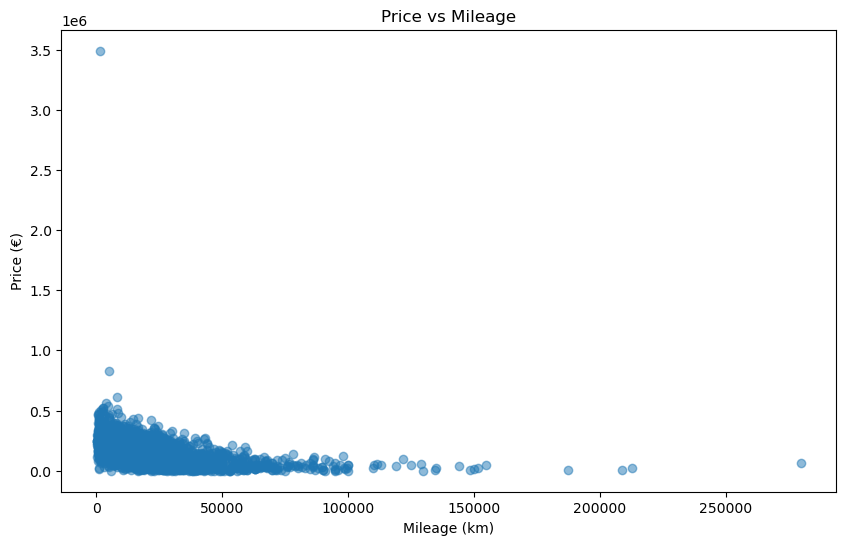

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['mileage'], alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (€)')
plt.show()


In [ ]:
import streamlit as st


st.title("Car Listings Analysis")
st.dataframe(df)


st.subheader("Price vs Mileage Scatter Plot")
fig, ax = plt.subplots()
ax.scatter(df['price'], df['mileage'], alpha=0.5)
ax.set_title('Price vs Mileage')
ax.set_xlabel('Mileage (km)')
ax.set_ylabel('Price (€)')
st.pyplot(fig)
